<a href="https://colab.research.google.com/github/Jayneshtandel/Case-Study--Intelligence-System-In-Production-Group-B-/blob/main/intelligence_system_case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

STEP 1: Load the dataset and do basic inspection
🔍 Goal:

Read the CSV

Check the structure (rows, columns)

View sample rows

In [ ]:
import pandas as pd

# Load dataset
file_path = "DataCoSupplyChainDataset.csv"  # If in Colab, you can upload or mount Drive
df = pd.read_csv(file_path, encoding='ISO-8859-1')

# Basic info
print("Shape of dataset:", df.shape)
print("Column names:\n", df.columns.tolist())

# Preview first 5 rows
df.head()


Shape of dataset: (4010, 53)
Column names:
 ['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)', 'Benefit per order', 'Sales per customer', 'Delivery Status', 'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City', 'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id', 'Customer Lname', 'Customer Password', 'Customer Segment', 'Customer State', 'Customer Street', 'Customer Zipcode', 'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market', 'Order City', 'Order Country', 'Order Customer Id', 'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id', 'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id', 'Order Item Product Price', 'Order Item Profit Ratio', 'Order Item Quantity', 'Sales', 'Order Item Total', 'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status', 'Order Zipcode', 'Product Card Id', 'Product Category Id', 'Product Description', 'Product Image', 'Product Name', 'Product Price'

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360.0,73.0,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0.0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360.0,73.0,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0.0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360.0,73.0,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0.0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360.0,73.0,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0.0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360.0,73.0,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0.0,1/15/2018 11:24,Standard Class


In [ ]:
from tensorflow.keras.models import load_model
import joblib
import os

# Check if model_reg and scaler are defined before attempting to save
if 'model_reg' in globals() and 'scaler' in globals():
    model_reg.save("leadtime_forecast_model.h5")
    joblib.dump(scaler, "scaler.pkl")
    print("Saved: leadtime_forecast_model.h5 and scaler.pkl")
elif os.path.exists("leadtime_forecast_model.h5") and os.path.exists("scaler.pkl"):
    print("Model and scaler already exist on disk, no action taken.")
else:
    print("Error: 'model_reg' or 'scaler' not found in the current environment.")
    print("Please ensure that the preceding cells defining and training these objects (e.g., cell k9I9zO1vrIVh) have been executed.")

Saved: leadtime_forecast_model.h5 and scaler.pkl


STEP 2: Parse Date Columns and Compute Lead Time Metrics
🔍 Goal:
**bold text**
Convert date strings into datetime format

Create new columns:

Actual Lead Time = how many days delivery took

Scheduled Lead Time = how many days were promised

Lead Time Variance = actual - scheduled

**Explanation:**

We converted both date columns so we can work with them easily

We explicitly named new columns so your model can learn from:

Lead Time (Actual): How long it actually took

Lead Time (Scheduled): What was promised

Lead Time Variance: How late (or early) the delivery was

We cleaned rows where dates were missing to avoid errors in plotting or training

In [ ]:
# Convert order and shipping date strings to datetime
df['Order Date'] = pd.to_datetime(df['order date (DateOrders)'], errors='coerce')
df['Ship Date'] = pd.to_datetime(df['shipping date (DateOrders)'], errors='coerce')

# Create meaningful lead time columns
df['Lead Time (Actual)'] = df['Days for shipping (real)']
df['Lead Time (Scheduled)'] = df['Days for shipment (scheduled)']
df['Lead Time Variance'] = df['Lead Time (Actual)'] - df['Lead Time (Scheduled)']

# Drop rows with invalid dates (NaT values)
df = df.dropna(subset=['Order Date', 'Ship Date'])


STEP 3: Visualize Lead Time Patterns Over Time
🔍 Goal: **bold text****bold text**

Plot actual vs scheduled lead time over time

See how lead time changes chronologically

Explanation:
**bold text**
This plot helps us visually compare what was promised vs what actually happened

The gap between lines indicates how often deliveries are early, on time, or delayed

Trends or seasonal issues (e.g. spikes in holidays) can become visible



/tmp/ipython-input-2305095161.py:16: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


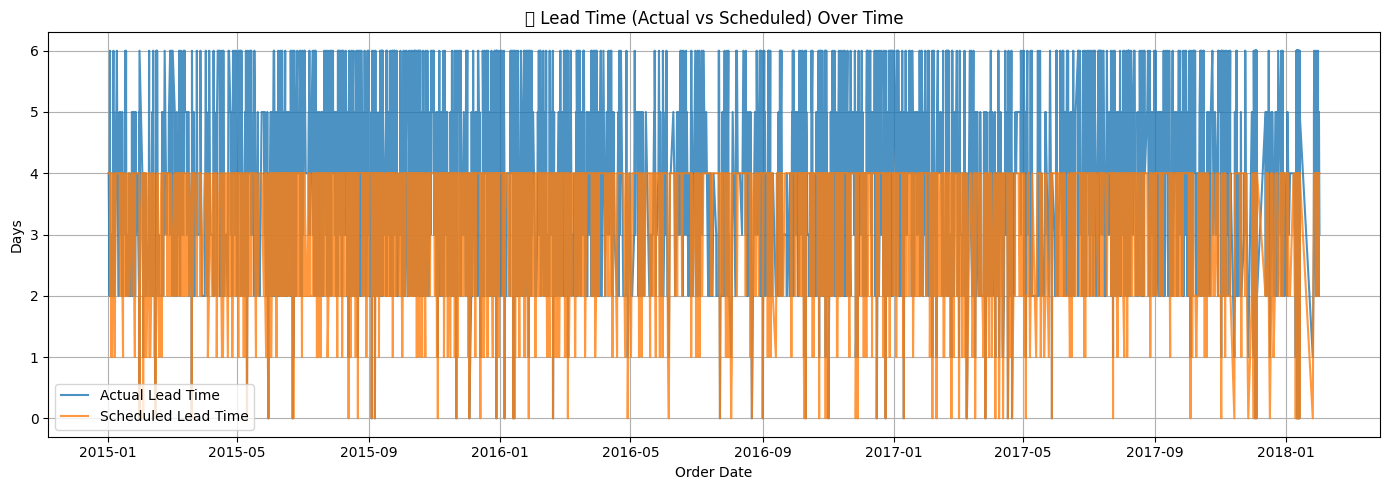

In [ ]:
import matplotlib.pyplot as plt

# Sort by order date for plotting
df_sorted = df.sort_values('Order Date')

# Plot: Actual vs Scheduled Lead Time Over Time
plt.figure(figsize=(14, 5))
plt.plot(df_sorted['Order Date'], df_sorted['Lead Time (Actual)'], label='Actual Lead Time', alpha=0.8)
plt.plot(df_sorted['Order Date'], df_sorted['Lead Time (Scheduled)'], label='Scheduled Lead Time', alpha=0.8)

plt.title('📦 Lead Time (Actual vs Scheduled) Over Time')
plt.xlabel('Order Date')
plt.ylabel('Days')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


STEP 4: Visualize Lead Time Variance (Delays and Early Deliveries)
🔍 Goal: **bold text**

Plot a histogram of Lead Time Variance

Understand how frequently deliveries are early, late, or on time

**Explanation:**

Negative values → Early deliveries

Zero → On time

Positive values → Late deliveries

KDE curve (smooth line) helps visualize the density

This helps identify how common late deliveries are and how far they usually go beyond the scheduled time.

/tmp/ipython-input-2094459361.py:11: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


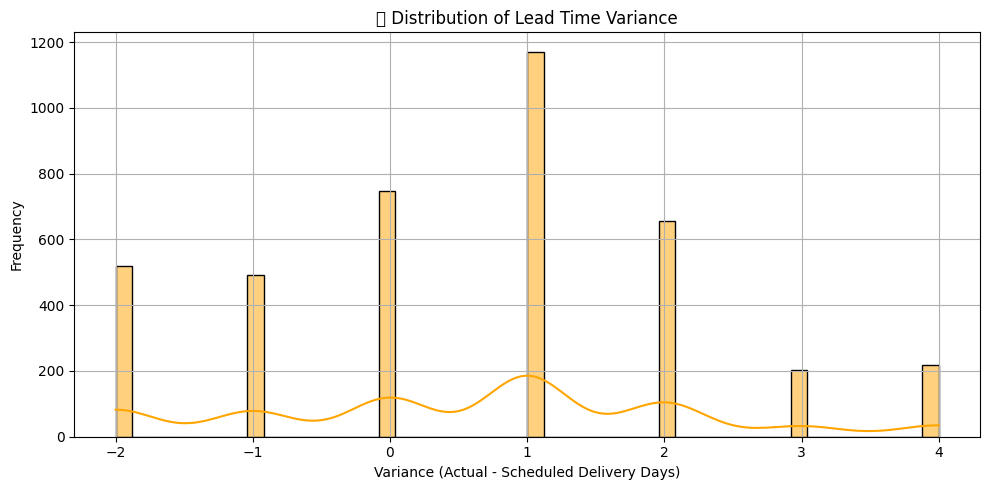

In [ ]:
import seaborn as sns

# Histogram of Lead Time Variance
plt.figure(figsize=(10, 5))
sns.histplot(df['Lead Time Variance'], bins=50, kde=True, color='orange')

plt.title('📊 Distribution of Lead Time Variance')
plt.xlabel('Variance (Actual - Scheduled Delivery Days)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


STEP 5: Late Delivery Risk by Shipping Mode
🔍 Goal:

Use a count plot to compare how often each shipping method results in a late delivery

Column to use: Late_delivery_risk (0 = on time, 1 = late)
Explanation:

This shows how each shipping mode performs in terms of on-time delivery

You’ll likely see Standard Class with more delays compared to Same Day or First Class

This is useful for your model later — Shipping Mode will be a key input feature

/tmp/ipython-input-2964718551.py:9: UserWarning: Glyph 128666 (\N{DELIVERY TRUCK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128666 (\N{DELIVERY TRUCK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


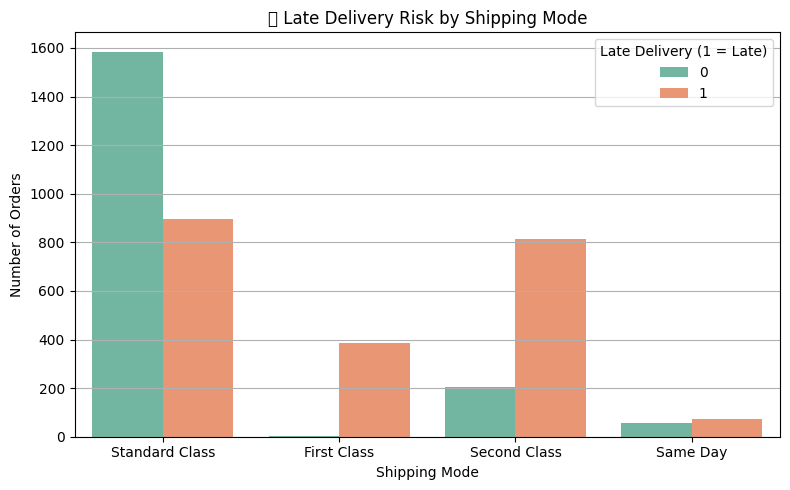

In [ ]:
# Count of Late vs On-Time Deliveries by Shipping Mode
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Shipping Mode', hue='Late_delivery_risk', palette='Set2')

plt.title('🚚 Late Delivery Risk by Shipping Mode')
plt.xlabel('Shipping Mode')
plt.ylabel('Number of Orders')
plt.legend(title='Late Delivery (1 = Late)', loc='upper right')
plt.tight_layout()
plt.grid(True, axis='y')
plt.show()


STEP 6 (Updated): Prepare Features and Target for Modeling
🔍 Goal: **bold text**

Select relevant features

Encode categorical variables

Scale numeric ones

Create feature matrix X and target vector y
**Explanation:**

One-hot encoding is now done with toarray() for compatibility

You now have X (input features) and y (target) ready

It works regardless of your scikit-learn version



In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import numpy as np
import pandas as pd

# 🎯 Target: change this line for forecasting or classification
target_col = 'Lead Time (Actual)'  # or use 'Late_delivery_risk' for binary classification

# ✅ Selected features (feel free to extend this list)
feature_cols = [
    'Days for shipment (scheduled)', 'Shipping Mode', 'Market',
    'Order Item Quantity', 'Sales per customer'
]

# Filter the needed columns
df_model = df[feature_cols + [target_col]].dropna().copy()

# ✅ One-hot encode categorical features
cat_cols = ['Shipping Mode', 'Market']
encoder = OneHotEncoder(drop='first')  # sparse_output=False is not needed in older versions
encoded_arr = encoder.fit_transform(df_model[cat_cols]).toarray()
encoded_feature_names = encoder.get_feature_names_out(cat_cols)

# ✅ Normalize numeric features
num_cols = ['Days for shipment (scheduled)', 'Order Item Quantity', 'Sales per customer']
scaler = StandardScaler()
scaled_arr = scaler.fit_transform(df_model[num_cols])

# ✅ Combine numeric + encoded categorical
X = np.hstack([scaled_arr, encoded_arr])
y = df_model[target_col].values

# ✅ Wrap into DataFrame for inspection
X_df = pd.DataFrame(X, columns=list(num_cols) + list(encoded_feature_names))

print("✅ Feature matrix shape:", X.shape)
print("✅ Target shape:", y.shape)
X_df.head()


✅ Feature matrix shape: (4009, 10)
✅ Target shape: (4009,)


,Days for shipment (scheduled),Order Item Quantity,Sales per customer,Shipping Mode_Same Day,Shipping Mode_Second Class,Shipping Mode_Standard Class,Market_Europe,Market_LATAM,Market_Pacific Asia,Market_USCA
0,0.743831,-0.816561,1.037521,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.743831,-0.816561,1.011774,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.743831,-0.816561,0.998902,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.743831,-0.816561,0.960361,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.743831,-0.816561,0.908869,0.0,0.0,1.0,0.0,0.0,1.0,0.0


STEP 7: Train a CNN–BiLSTM Model to Predict Lead Time
🔍 Goal:
**bold text**
Use the features from Step 6 to build a hybrid CNN + Bidirectional LSTM model that predicts lead time.
Explanation:
**bold text**
We're reshaping each row as a 1-step time-series input: this allows us to reuse CNN+BiLSTM now and later scale up to sequences

The CNN layers help extract local patterns (like grouped inputs)

The BiLSTM captures temporal context (right now it's minimal, but this sets the structure)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split

# Reshape input to 3D: [samples, time_steps, features]
# We'll treat each sample as a single-step sequence for now (can expand later)
X_seq = X.reshape((X.shape[0], 1, X.shape[1]))  # [N, 1, features]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_seq, y, test_size=0.2, random_state=42)

# ✅ Build CNN-BiLSTM model
model = models.Sequential([
    layers.Conv1D(32, kernel_size=1, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    layers.Conv1D(32, kernel_size=1, activation='relu'),
    layers.Bidirectional(layers.LSTM(64)),
    layers.Dropout(0.2),
    layers.Dense(1)  # output: lead time (regression)
])

model.compile(optimizer='adam', loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse')])

# ✅ Train
history = model.fit(X_train, y_train, validation_split=0.1, epochs=15, batch_size=128, verbose=1)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - loss: 14.7753 - rmse: 3.8426 - val_loss: 10.1999 - val_rmse: 3.1937
Epoch 2/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 7.3043 - rmse: 2.6936 - val_loss: 2.7507 - val_rmse: 1.6585
Epoch 3/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2.7768 - rmse: 1.6656 - val_loss: 2.2749 - val_rmse: 1.5083
Epoch 4/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.1459 - rmse: 1.4648 - val_loss: 2.0929 - val_rmse: 1.4467
Epoch 5/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2.0556 - rmse: 1.4337 - val_loss: 1.9808 - val_rmse: 1.4074
Epoch 6/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.9335 - rmse: 1.3904 - val_loss: 1.9352 - val_rmse: 1.3911
Epoch 7/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.8874 - rmse: 1.3738 - val_loss: 1.9108 - val_rmse: 1.3823
Epoch 8/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.8590 - rmse: 1.3634 - val_loss: 1.8674 - val_rmse: 1.3665
Epoch 9/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import numpy as np
import pandas as pd

# Select new feature set
feature_cols = [
    'Days for shipment (scheduled)', 'Shipping Mode', 'Market',
    'Order Item Quantity', 'Sales per customer', 'Order Region',
    'Department Name', 'Order Item Product Price',
    'Order Item Discount', 'Order Item Profit Ratio'
]

target_col = 'Lead Time (Actual)'

# Drop nulls
df_model = df[feature_cols + [target_col]].dropna()

# One-hot encode categoricals
cat_cols = ['Shipping Mode', 'Market', 'Order Region', 'Department Name']
encoder = OneHotEncoder(drop='first')
X_cat = encoder.fit_transform(df_model[cat_cols]).toarray()
cat_names = encoder.get_feature_names_out(cat_cols)

# Scale numerics
num_cols = list(set(feature_cols) - set(cat_cols))
scaler = StandardScaler()
X_num = scaler.fit_transform(df_model[num_cols])

# Final input features
X = np.hstack([X_num, X_cat])
y = df_model[target_col].values

# Reshape for sequence input [samples, time_steps, features]
X_seq = X.reshape((X.shape[0], 1, X.shape[1]))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_seq, y, test_size=0.2, random_state=42)

# Build improved CNN-BiLSTM model
model = models.Sequential([
    layers.Input(shape=(1, X.shape[1])),
    layers.Conv1D(64, kernel_size=1, activation='relu'),
    layers.BatchNormalization(),
    layers.Conv1D(64, kernel_size=1, activation='relu'),
    layers.Bidirectional(layers.LSTM(128)),
    layers.Dropout(0.3),
    layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse')])

# Train
history = model.fit(X_train, y_train, validation_split=0.1, epochs=20, batch_size=64, verbose=1)


Epoch 1/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 8.2812 - rmse: 2.8287 - val_loss: 8.8196 - val_rmse: 2.9698
Epoch 2/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 1.9613 - rmse: 1.3999 - val_loss: 7.3595 - val_rmse: 2.7128
Epoch 3/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 1.7824 - rmse: 1.3350 - val_loss: 5.8089 - val_rmse: 2.4102
Epoch 4/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.7527 - rmse: 1.3238 - val_loss: 4.3810 - val_rmse: 2.0931
Epoch 5/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.7111 - rmse: 1.3080 - val_loss: 3.2668 - val_rmse: 1.8074
Epoch 6/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.6994 - rmse: 1.3033 - val_loss: 2.7291 - val_rmse: 1.6520
Epoch 7/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 1.6922 - rmse: 1.3007 - val_loss: 2.4772 - val_rmse: 1.5739
Epoch 8/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 1.6502 - rmse: 1.2845 - val_loss: 2.1065 - val_rmse: 1.4514
Epoch 9/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/st

Dual Modeling Strategy
▶️ Option 1: Regression

🎯 Predict exact lead time

📈 Metrics: RMSE, MAE, residual plots

🧠 Model: CNN–BiLSTM (you’ve already built this!)

▶️ Option 2: Classification

🎯 Predict whether a delivery will be late

📊 Metrics: Accuracy, Precision, Recall, F1, Confusion Matrix

🧠 Model: CNN–BiLSTM (different loss function & output layer)

This lets you:

Build a forecasting tool for managers who need exact timing

Also build a risk alert system that flags late shipments early

💡 How to Organize Your Project:
Part	Goal	Target	Model	Evaluation
A	Lead Time Forecasting	Lead Time (Actual)	CNN–BiLSTM	RMSE, MAE, Residuals
B	Late Risk Detection	Late_delivery_risk	CNN–BiLSTM	Precision, Recall, F1, Confusion Matrix

Epoch 1/15
180/180 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - loss: 4.7467 - rmse: 2.1055 - val_loss: 3.8086 - val_rmse: 1.9516
Epoch 2/15
180/180 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 1.7895 - rmse: 1.3377 - val_loss: 1.8760 - val_rmse: 1.3697
Epoch 3/15
180/180 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 1.7778 - rmse: 1.3333 - val_loss: 1.7856 - val_rmse: 1.3363
Epoch 4/15
180/180 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 1.8001 - rmse: 1.3415 - val_loss: 1.7939 - val_rmse: 1.3394
Epoch 5/15
180/180 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 1.7692 - rmse: 1.3301 - val_loss: 1.8752 - val_rmse: 1.3694
Epoch 6/15
180/180 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 1.7962 - rmse: 1.3401 - val_loss: 1.7890 - val_rmse: 1.3376
Epoch 7/15
180/180 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 1.7935 - rmse: 1.3391 - val_loss: 1.7871 - val_rmse: 1.3368
Epoch 8/15
180/180 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 1.7449 - rmse: 1.3209 - val_loss: 1.7866 - val_rmse: 1.3367
Epoch 9/15
180/180 ━━━━━━━━━━━━━

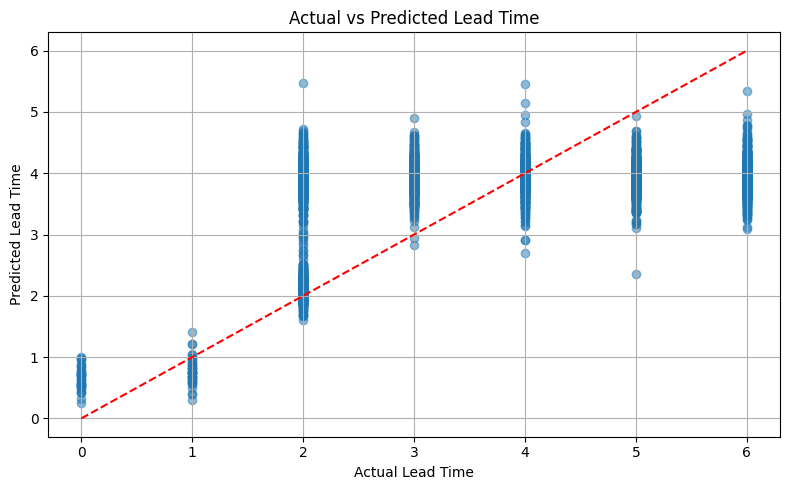

Epoch 1/15
180/180 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.6436 - loss: 0.6446 - val_accuracy: 0.6923 - val_loss: 0.5910
Epoch 2/15
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6904 - loss: 0.5949 - val_accuracy: 0.6915 - val_loss: 0.5879
Epoch 3/15
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6820 - loss: 0.5943 - val_accuracy: 0.6923 - val_loss: 0.5861
Epoch 4/15
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6909 - loss: 0.5776 - val_accuracy: 0.6923 - val_loss: 0.5853
Epoch 5/15
180/180 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.6897 - loss: 0.5795 - val_accuracy: 0.6931 - val_loss: 0.5830
Epoch 6/15
180/180 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6839 - loss: 0.5854 - val_accuracy: 0.6915 - val_loss: 0.5832
Epoch 7/15
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6898 - loss: 0.5761 - val_accuracy: 0.6907 - val_loss: 0.5834
Epoch 8/15
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6862 - loss: 0.5771 - val_accuracy: 

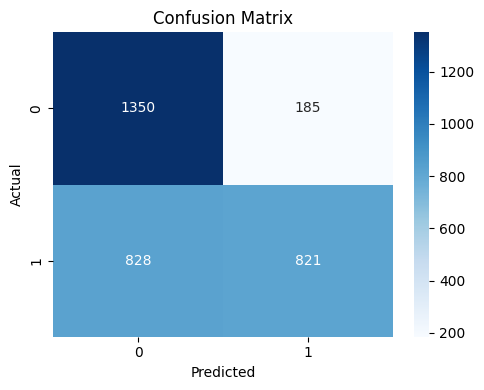

In [ ]:
# === SUPPLY CHAIN DUAL MODELING PIPELINE ===
# 📦 CNN-BiLSTM for Regression + Classification in Supply Chain

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras import layers, models

# === Load Dataset ===
df = pd.read_csv("DataCoSupplyChainDataset.csv", encoding='ISO-8859-1')

# === Parse Dates and Lead Time ===
df['Order Date'] = pd.to_datetime(df['order date (DateOrders)'], errors='coerce')
df['Ship Date'] = pd.to_datetime(df['shipping date (DateOrders)'], errors='coerce')
df['Lead Time (Actual)'] = df['Days for shipping (real)']
df['Lead Time (Scheduled)'] = df['Days for shipment (scheduled)']
df['Lead Time Variance'] = df['Lead Time (Actual)'] - df['Lead Time (Scheduled)']
df.dropna(subset=['Order Date', 'Ship Date'], inplace=True)

# === Shared Feature List ===
features = [
    'Days for shipment (scheduled)', 'Shipping Mode', 'Market',
    'Order Item Quantity', 'Sales per customer', 'Order Region',
    'Department Name', 'Order Item Product Price',
    'Order Item Discount', 'Order Item Profit Ratio'
]

# === Categorical Columns ===
cat_cols = ['Shipping Mode', 'Market', 'Order Region', 'Department Name']

# === STEP A: Regression Model (Lead Time Forecasting) ===
reg_df = df[features + ['Lead Time (Actual)']].dropna()
enc = OneHotEncoder(drop='first')
X_cat = enc.fit_transform(reg_df[cat_cols]).toarray()
scaler = StandardScaler()
X_num = scaler.fit_transform(reg_df[[col for col in features if col not in cat_cols]])
X_reg = np.hstack([X_num, X_cat])
y_reg = reg_df['Lead Time (Actual)'].values
X_seq_reg = X_reg.reshape((X_reg.shape[0], 1, X_reg.shape[1]))
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_seq_reg, y_reg, test_size=0.2, random_state=42)

model_reg = models.Sequential([
    layers.Input(shape=(1, X_reg.shape[1])),
    layers.Conv1D(64, 1, activation='relu'),
    layers.BatchNormalization(),
    layers.Conv1D(64, 1, activation='relu'),
    layers.Bidirectional(layers.LSTM(128)),
    layers.Dropout(0.3),
    layers.Dense(1)
])

model_reg.compile(optimizer='adam', loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse')])
model_reg.fit(Xr_train, yr_train, validation_split=0.1, epochs=15, batch_size=64, verbose=1)

# === Regression Evaluation ===
ypred_reg = model_reg.predict(Xr_test).flatten()
print("\n📈 REGRESSION METRICS")
print("RMSE:", np.sqrt(mean_squared_error(yr_test, ypred_reg)))
print("MAE:", mean_absolute_error(yr_test, ypred_reg))

plt.figure(figsize=(8, 5))
plt.scatter(yr_test, ypred_reg, alpha=0.5)
plt.plot([yr_test.min(), yr_test.max()], [yr_test.min(), yr_test.max()], 'r--')
plt.xlabel('Actual Lead Time')
plt.ylabel('Predicted Lead Time')
plt.title('Actual vs Predicted Lead Time')
plt.grid(True)
plt.tight_layout()
plt.show()

# === STEP B: Classification Model (Late Delivery Risk) ===
cls_df = df[features + ['Late_delivery_risk']].dropna()
X_cat_cls = enc.transform(cls_df[cat_cols]).toarray()
X_num_cls = scaler.transform(cls_df[[col for col in features if col not in cat_cols]])
X_cls = np.hstack([X_num_cls, X_cat_cls])
y_cls = cls_df['Late_delivery_risk'].values
X_seq_cls = X_cls.reshape((X_cls.shape[0], 1, X_cls.shape[1]))
Xc_train, Xc_test, yc_train, yc_test = train_test_split(X_seq_cls, y_cls, test_size=0.2, random_state=42)

model_cls = models.Sequential([
    layers.Input(shape=(1, X_cls.shape[1])),
    layers.Conv1D(32, 1, activation='relu'),
    layers.Bidirectional(layers.LSTM(64)),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

model_cls.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_cls.fit(Xc_train, yc_train, validation_split=0.1, epochs=15, batch_size=64, verbose=1)

# === Classification Evaluation ===
yc_pred_prob = model_cls.predict(Xc_test).flatten()
yc_pred = (yc_pred_prob > 0.5).astype(int)
print("\n📊 CLASSIFICATION REPORT:")
print(classification_report(yc_test, yc_pred, digits=4))

cm = confusion_matrix(yc_test, yc_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


**Step C — Anomaly Detection with LSTM Autoencoder**

This will help you identify unusual shipping patterns, such as:

Abnormally high lead time

Orders with strange profit/loss behavior

Outlier delivery performance (even if not marked "late")

🧠 **What’s an LSTM Autoencoder?**

It learns the “normal” pattern of sequences (e.g. shipping behavior)

Then it reconstructs inputs →

Epoch 1/15
492/492 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - loss: 2.8401 - rmse: 1.6355 - val_loss: 1.5527 - val_rmse: 1.2461
Epoch 2/15
492/492 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - loss: 1.5970 - rmse: 1.2637 - val_loss: 1.5377 - val_rmse: 1.2400
Epoch 3/15
492/492 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 1.5863 - rmse: 1.2595 - val_loss: 1.5451 - val_rmse: 1.2430
Epoch 4/15
492/492 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 1.5643 - rmse: 1.2507 - val_loss: 1.5482 - val_rmse: 1.2443
Epoch 5/15
492/492 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 1.5734 - rmse: 1.2544 - val_loss: 1.5354 - val_rmse: 1.2391
Epoch 6/15
492/492 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - loss: 1.5561 - rmse: 1.2474 - val_loss: 1.5298 - val_rmse: 1.2369
Epoch 7/15
492/492 ━━━━━━━━━━━━━━━━━━━━ 14s 13ms/step - loss: 1.5714 - rmse: 1.2535 - val_loss: 1.5456 - val_rmse: 1.2432
Epoch 8/15
492/492 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 1.5544 - rmse: 1.2467 - val_loss: 1.5527 - val_rmse: 1.2461
Epoch 9/15
492/492 ━━━━━━━━━━

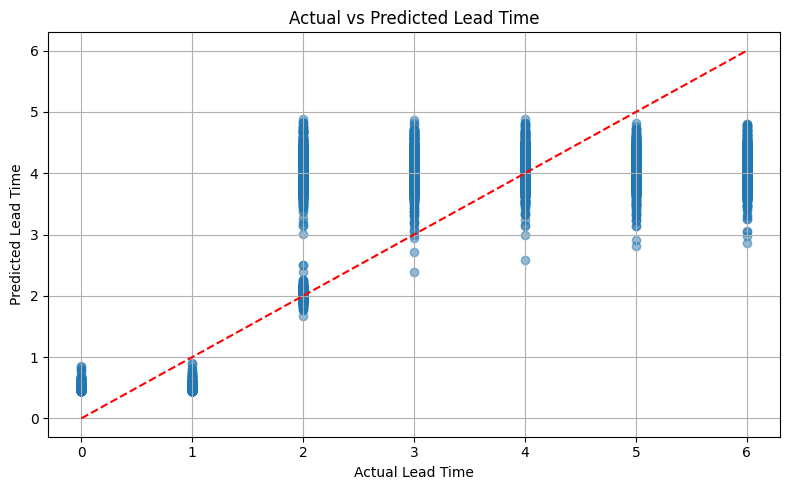

Epoch 1/15
492/492 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6712 - loss: 0.5861 - val_accuracy: 0.7205 - val_loss: 0.5197
Epoch 2/15
492/492 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7218 - loss: 0.5129 - val_accuracy: 0.7228 - val_loss: 0.5153
Epoch 3/15
492/492 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7205 - loss: 0.5150 - val_accuracy: 0.7208 - val_loss: 0.5139
Epoch 4/15
492/492 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7267 - loss: 0.5059 - val_accuracy: 0.7202 - val_loss: 0.5144
Epoch 5/15
492/492 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7250 - loss: 0.5060 - val_accuracy: 0.7171 - val_loss: 0.5153
Epoch 6/15
492/492 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7264 - loss: 0.5071 - val_accuracy: 0.7205 - val_loss: 0.5133
Epoch 7/15
492/492 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7277 - loss: 0.5047 - val_accuracy: 0.7219 - val_loss: 0.5133
Epoch 8/15
492/492 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7269 - loss: 0.5037 - val_accuracy: 0.

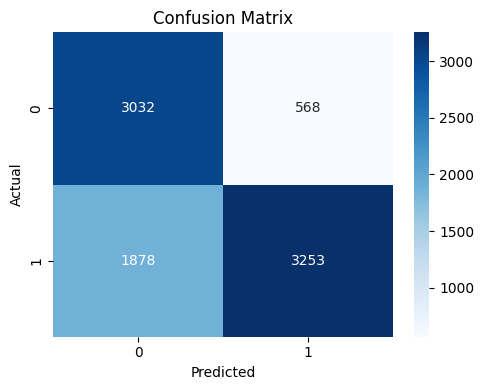

Epoch 1/7
307/307 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - loss: 0.1624 - val_loss: 0.0630
Epoch 2/7
307/307 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0595 - val_loss: 0.0380
Epoch 3/7
307/307 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0324 - val_loss: 0.0231
Epoch 4/7
307/307 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0235 - val_loss: 0.0169
Epoch 5/7
307/307 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0164 - val_loss: 0.0142
Epoch 6/7
307/307 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0143 - val_loss: 0.0128
Epoch 7/7
307/307 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.0126 - val_loss: 0.0112
1365/1365 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step


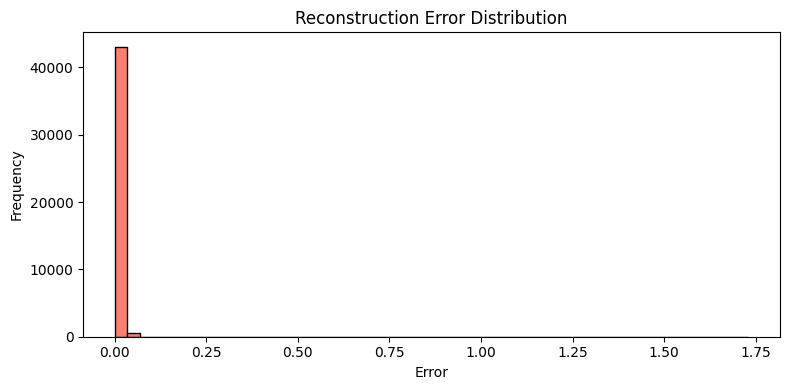


Top anomalies flagged: 873


In [ ]:

# === SUPPLY CHAIN DUAL MODELING PIPELINE WITH ANOMALY DETECTION ===
# 📦 CNN-BiLSTM for Regression + Classification + LSTM Autoencoder for Anomaly Detection

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras import layers, models

# === Load Dataset ===
df = pd.read_csv("DataCoSupplyChainDataset.csv", encoding='ISO-8859-1')

# === Parse Dates and Lead Time ===
df['Order Date'] = pd.to_datetime(df['order date (DateOrders)'], errors='coerce')
df['Ship Date'] = pd.to_datetime(df['shipping date (DateOrders)'], errors='coerce')
df['Lead Time (Actual)'] = df['Days for shipping (real)']
df['Lead Time (Scheduled)'] = df['Days for shipment (scheduled)']
df['Lead Time Variance'] = df['Lead Time (Actual)'] - df['Lead Time (Scheduled)']
df.dropna(subset=['Order Date', 'Ship Date'], inplace=True)

# === Shared Feature List ===
features = [
    'Days for shipment (scheduled)', 'Shipping Mode', 'Market',
    'Order Item Quantity', 'Sales per customer', 'Order Region',
    'Department Name', 'Order Item Product Price',
    'Order Item Discount', 'Order Item Profit Ratio'
]

# === Categorical Columns ===
cat_cols = ['Shipping Mode', 'Market', 'Order Region', 'Department Name']

# === STEP A: Regression Model (Lead Time Forecasting) ===
reg_df = df[features + ['Lead Time (Actual)']].dropna()
enc = OneHotEncoder(drop='first')
X_cat = enc.fit_transform(reg_df[cat_cols]).toarray()
scaler = StandardScaler()
X_num = scaler.fit_transform(reg_df[[col for col in features if col not in cat_cols]])
X_reg = np.hstack([X_num, X_cat])
y_reg = reg_df['Lead Time (Actual)'].values
X_seq_reg = X_reg.reshape((X_reg.shape[0], 1, X_reg.shape[1]))
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_seq_reg, y_reg, test_size=0.2, random_state=42)

model_reg = models.Sequential([
    layers.Input(shape=(1, X_reg.shape[1])),
    layers.Conv1D(64, 1, activation='relu'),
    layers.BatchNormalization(),
    layers.Conv1D(64, 1, activation='relu'),
    layers.Bidirectional(layers.LSTM(128)),
    layers.Dropout(0.3),
    layers.Dense(1)
])

model_reg.compile(optimizer='adam', loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse')])
model_reg.fit(Xr_train, yr_train, validation_split=0.1, epochs=15, batch_size=64, verbose=1)

# === Regression Evaluation ===
ypred_reg = model_reg.predict(Xr_test).flatten()
print("\n📈 REGRESSION METRICS")
print("RMSE:", np.sqrt(mean_squared_error(yr_test, ypred_reg)))
print("MAE:", mean_absolute_error(yr_test, ypred_reg))

plt.figure(figsize=(8, 5))
plt.scatter(yr_test, ypred_reg, alpha=0.5)
plt.plot([yr_test.min(), yr_test.max()], [yr_test.min(), yr_test.max()], 'r--')
plt.xlabel('Actual Lead Time')
plt.ylabel('Predicted Lead Time')
plt.title('Actual vs Predicted Lead Time')
plt.grid(True)
plt.tight_layout()
plt.show()

# === STEP B: Classification Model (Late Delivery Risk) ===
cls_df = df[features + ['Late_delivery_risk']].dropna()
X_cat_cls = enc.transform(cls_df[cat_cols]).toarray()
X_num_cls = scaler.transform(cls_df[[col for col in features if col not in cat_cols]])
X_cls = np.hstack([X_num_cls, X_cat_cls])
y_cls = cls_df['Late_delivery_risk'].values
X_seq_cls = X_cls.reshape((X_cls.shape[0], 1, X_cls.shape[1]))
Xc_train, Xc_test, yc_train, yc_test = train_test_split(X_seq_cls, y_cls, test_size=0.2, random_state=42)

model_cls = models.Sequential([
    layers.Input(shape=(1, X_cls.shape[1])),
    layers.Conv1D(32, 1, activation='relu'),
    layers.Bidirectional(layers.LSTM(64)),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

model_cls.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_cls.fit(Xc_train, yc_train, validation_split=0.1, epochs=15, batch_size=64, verbose=1)

# === Classification Evaluation ===
yc_pred_prob = model_cls.predict(Xc_test).flatten()
yc_pred = (yc_pred_prob > 0.5).astype(int)
print("\n📊 CLASSIFICATION REPORT:")
print(classification_report(yc_test, yc_pred, digits=4))

cm = confusion_matrix(yc_test, yc_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# === STEP C: LSTM Autoencoder for Anomaly Detection ===
auto_df = df[features].dropna()
X_cat_auto = enc.transform(auto_df[cat_cols]).toarray()
X_num_auto = scaler.transform(auto_df[[col for col in features if col not in cat_cols]])
X_auto = np.hstack([X_num_auto, X_cat_auto])
X_seq_auto = X_auto.reshape((X_auto.shape[0], 1, X_auto.shape[1]))

# Autoencoder Model
input_dim = X_seq_auto.shape[2]
autoencoder = models.Sequential([
    layers.Input(shape=(1, input_dim)),
    layers.LSTM(64, return_sequences=True),
    layers.LSTM(32, return_sequences=False),
    layers.RepeatVector(1),
    layers.LSTM(32, return_sequences=True),
    layers.LSTM(64, return_sequences=True),
    layers.TimeDistributed(layers.Dense(input_dim))
])

autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(X_seq_auto, X_seq_auto, epochs=7, batch_size=128, validation_split=0.1, verbose=1)

# Reconstruction error
X_pred = autoencoder.predict(X_seq_auto)
recon_error = np.mean(np.square(X_seq_auto - X_pred), axis=(1, 2))

# Plot reconstruction error
df_errors = pd.DataFrame({'Reconstruction Error': recon_error})
plt.figure(figsize=(8,4))
plt.hist(recon_error, bins=50, color='salmon', edgecolor='black')
plt.title("Reconstruction Error Distribution")
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Flag top anomalies
df_errors['Anomaly'] = df_errors['Reconstruction Error'] > np.percentile(recon_error, 98)
print("\nTop anomalies flagged:", df_errors['Anomaly'].sum())


In [ ]:
from tensorflow.keras.models import load_model

model_reg.save("leadtime_forecast_model.h5")
print("Saved model_reg as leadtime_forecast_model.h5")


Saved model_reg as leadtime_forecast_model.h5


In [ ]:
!pip install gradio


In [ ]:
import gradio as gr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import load_model
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

# ---------------- CONFIG ----------------
MODEL_PATH = "leadtime_forecast_model.h5"   # must be in current folder

# Raw column names from DataCoSupplyChainDataset
RAW_ORDER_DATE_COL = "order date (DateOrders)"
RAW_SHIP_DATE_COL  = "shipping date (DateOrders)"

# Derived / internal names
ORDER_DATE_COL   = "Order Date"
ACTUAL_LT_COL    = "Lead Time (Actual)"
SCHED_LT_COL     = "Lead Time (Scheduled)"
VAR_LT_COL       = "Lead Time Variance"

# Features you used when training the CNN–BiLSTM regressor
FEATURE_COLS = [
    "Days for shipment (scheduled)", "Shipping Mode", "Market",
    "Order Item Quantity", "Sales per customer", "Order Region",
    "Department Name", "Order Item Product Price",
    "Order Item Discount", "Order Item Profit Ratio"
]

CATEGORICAL_COLS = ["Shipping Mode", "Market", "Order Region", "Department Name"]
# ----------------------------------------

model = load_model(MODEL_PATH, compile=False)
print("✅ Model loaded:", MODEL_PATH)
print("Input shape:", model.input_shape)


✅ Model loaded: leadtime_forecast_model.h5
Input shape: (None, 1, 45)


In [ ]:
def preprocess_for_model(df: pd.DataFrame):
    """
    Rebuilds the same preprocessing you used to train model_reg.
    Returns:
      X_seq  – (n_samples, 1, n_features) for CNN–BiLSTM
      y      – actual lead time values
      dates  – order dates for each row
      df_used – cleaned dataframe aligned with X_seq/y
    """

    # 1) Check raw columns
    required_raw = [RAW_ORDER_DATE_COL, RAW_SHIP_DATE_COL,
                    "Days for shipping (real)", "Days for shipment (scheduled)"]
    missing_raw = [c for c in required_raw if c not in df.columns]
    if missing_raw:
        raise KeyError(f"Missing raw columns: {missing_raw}\n"
                       f"Available columns: {list(df.columns)}")

    df = df.copy()

    # 2) Derived columns (same as notebook)
    df[ORDER_DATE_COL] = pd.to_datetime(df[RAW_ORDER_DATE_COL], errors="coerce")
    df["Ship Date"]    = pd.to_datetime(df[RAW_SHIP_DATE_COL], errors="coerce")
    df[ACTUAL_LT_COL]  = df["Days for shipping (real)"]
    df[SCHED_LT_COL]   = df["Days for shipment (scheduled)"]
    df[VAR_LT_COL]     = df[ACTUAL_LT_COL] - df[SCHED_LT_COL]

    df = df.dropna(subset=[ORDER_DATE_COL, "Ship Date"]).reset_index(drop=True)

    # 3) Make regression dataframe
    reg_cols = FEATURE_COLS + [ACTUAL_LT_COL]
    missing_features = [c for c in FEATURE_COLS if c not in df.columns]
    if missing_features:
        raise KeyError(f"Missing feature columns: {missing_features}")

    reg_df = df[reg_cols].dropna().copy()
    if reg_df.empty:
        raise ValueError("No rows left after dropna on regression features.")

    reg_idx = reg_df.index

    # 4) Encode categoricals
    enc = OneHotEncoder(drop="first")
    X_cat = enc.fit_transform(reg_df[CATEGORICAL_COLS]).toarray()

    # 5) Scale numericals
    num_cols = [c for c in FEATURE_COLS if c not in CATEGORICAL_COLS]
    scaler = StandardScaler()
    X_num = scaler.fit_transform(reg_df[num_cols])

    # 6) Combine
    X_reg = np.hstack([X_num, X_cat])
    y = reg_df[ACTUAL_LT_COL].values

    # 7) Reshape for CNN–BiLSTM: (samples, 1, features)
    X_seq = X_reg.reshape((X_reg.shape[0], 1, X_reg.shape[1]))

    # 8) Order dates aligned to these rows
    dates = df.loc[reg_idx, ORDER_DATE_COL].values
    df_used = df.loc[reg_idx].copy()

    return X_seq, y, dates, df_used


def compute_kpis(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)   # no 'squared' arg
    rmse = np.sqrt(mse)
    mape = np.mean(
        np.abs((y_true - y_pred) / np.clip(y_true, 1e-6, None))
    ) * 100
    return mae, rmse, mape


In [ ]:
import io, traceback

def leadtime_dashboard(csv_file):
    try:
        # Load CSV
        try:
            df = pd.read_csv(csv_file.name, encoding="ISO-8859-1")
        except Exception:
            df = pd.read_csv(csv_file.name)

        # Preprocess like training
        X_seq, y_true, dates, df_used = preprocess_for_model(df)

        # Predict
        y_pred = model.predict(X_seq).flatten()

        # KPIs
        mae, rmse, mape = compute_kpis(y_true, y_pred)
        kpi_text = (
            f"MAE: {mae:.2f} days  |  "
            f"RMSE: {rmse:.2f} days  |  "
            f"MAPE: {mape:.1f}%"
        )

        # Plot
        fig, ax = plt.subplots(figsize=(10, 4))
        ax.plot(dates, y_true, label="Actual Lead Time")
        ax.plot(dates, y_pred, label="Predicted Lead Time")
        if SCHED_LT_COL in df_used.columns:
            ax.plot(dates, df_used[SCHED_LT_COL].values,
                    label="Scheduled Lead Time", alpha=0.7)

        ax.set_xlabel("Order Date")
        ax.set_ylabel("Lead Time (days)")
        ax.set_title("Actual vs Predicted Lead Time")
        ax.legend()
        fig.tight_layout()

        # Table preview
        preview = pd.DataFrame({
            "Order Date": dates,
            "Actual Lead Time": y_true,
            "Predicted Lead Time": y_pred
        }).head(50)

        return fig, preview, kpi_text

    except Exception:
        # Show full traceback text in KPIs when something fails
        buf = io.StringIO()
        traceback.print_exc(file=buf)
        err_text = buf.getvalue()
        return None, None, "ERROR:\n" + err_text


In [ ]:
interface = gr.Interface(
    fn=leadtime_dashboard,
    inputs=gr.File(label="Upload your Supply Chain CSV"),
    outputs=[
        gr.Plot(label="Actual vs Predicted Lead Time"),
        gr.Dataframe(label="Sample Predictions (first 50 rows)"),
        gr.Textbox(label="KPIs / Errors")
    ],
    title="Lead-Time Prediction Dashboard",
    description="Upload ERP CSV → CNN–BiLSTM model predicts lead time → Plot + KPIs."
)

interface.launch()


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://be85ab34035ec621b6.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
